训练集形状: (1460, 81)
测试集形状: (1459, 80)



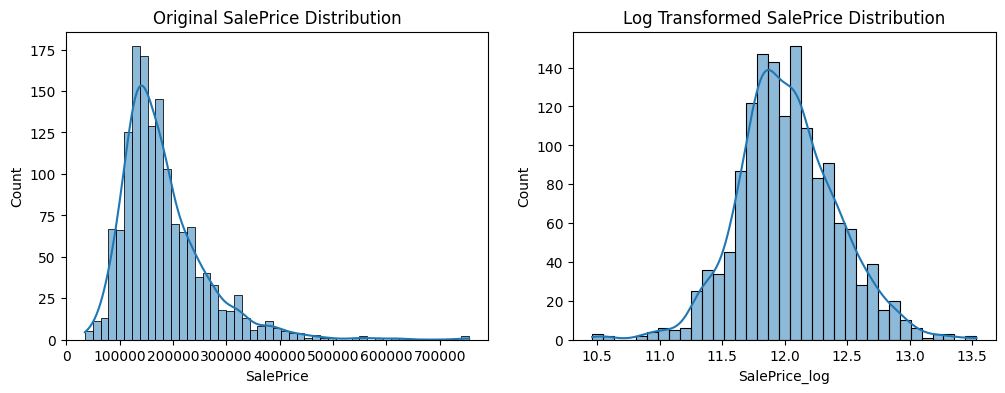

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. 加载数据
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

print(f"训练集形状: {train_df.shape}")
print(f"测试集形状: {test_df.shape}\n")

# 2. 查看目标变量（房价）的分布
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
# 原始分布
sns.histplot(train_df['SalePrice'], kde=True, ax=axes[0])
axes[0].set_title('Original SalePrice Distribution')
# 取对数后的分布（回归问题中常用来处理右偏数据）
train_df['SalePrice_log'] = np.log1p(train_df['SalePrice'])
sns.histplot(train_df['SalePrice_log'], kde=True, ax=axes[1])
axes[1].set_title('Log Transformed SalePrice Distribution')
plt.show()

# 3. 查看数据概览
print(train_df.info()) # 查看特征类型和缺失情况
print(train_df.describe()) # 查看数值特征的统计信息


In [ ]:
# 计算并可视化缺失情况
missing = train_df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing / len(train_df)) * 100
missing_info = pd.concat([missing, missing_percent], axis=1, keys=['Total', 'Percent'])
# 只显示有缺失的列
missing_data = missing_info[missing_info['Total'] > 0]
print(f"共有 {missing_data.shape[0]} 个特征存在缺失值")
print(missing_data.head(20)) # 查看缺失最严重的前20个

# 可选：绘制缺失值分布条形图
plt.figure(figsize=(10,6))
plt.bar(missing_data.head(20).index, missing_data.head(20)['Percent'])
plt.xticks(rotation=90)
plt.ylabel('缺失百分比 (%)')
plt.title('缺失值最多的20个特征')
plt.tight_layout()
plt.show()